In [10]:
import matplotlib.pyplot as plt
import pickle as pkl
import numpy as np

In [11]:
with open('./rewards/rewards (3) (1).pkl', 'rb') as f:
    rewards = pkl.load(f)

In [12]:
coef = np.polyfit(range(len(rewards)), rewards, 1)
poly1d_fn = np.poly1d(coef)
x = range(len(rewards))

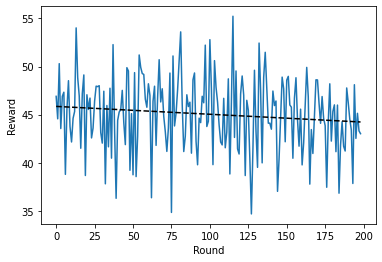

In [13]:
plt.plot(x,rewards, x, poly1d_fn(x), '--k')
#plt.plot(rewards)
plt.ylabel("Reward")
plt.xlabel("Round")
plt.show()